In [1]:
import pandas as pd
import numpy as np

In [2]:
d2=pd.read_csv('p2_features.csv')

In [3]:
d2.head()

,ID,x_mean_Acc,y_mean_Acc,z_mean_Acc,x_mean_Lin,y_mean_Lin,z_mean_Lin,x_mean_Gyro,y_mean_Gyro,z_mean_Gyro,...,x_arg_diff_fft_Acc,y_arg_diff_fft_Acc,z_arg_diff_fft_Acc,x_arg_diff_fft_Lin,y_arg_diff_fft_Lin,z_arg_diff_fft_Lin,x_arg_diff_fft_Gyro,y_arg_diff_fft_Gyro,z_arg_diff_fft_Gyro,label_of_activity
0,0,3.304620,-8.461805,-1.406655,0.141120,-1.033756,0.295374,0.058478,0.017809,0.032045,...,4,5,14,15,7,11,5,8,12,walking
1,1,3.339144,-8.462348,-1.420094,0.124134,-1.041664,0.249398,0.010303,0.042677,0.022743,...,15,5,3,1,12,2,14,8,14,walking
2,2,3.348574,-8.557408,-1.409616,0.171317,-1.065748,0.078740,0.022368,0.010915,-0.028929,...,3,5,3,8,6,8,12,2,14,walking
3,3,3.388383,-8.577661,-1.319976,0.252578,-1.051342,0.139936,0.040750,0.044479,0.067079,...,6,5,5,14,12,8,7,5,14,walking
4,4,3.312872,-8.493834,-1.278280,0.112571,-0.961628,0.214580,-0.038011,0.039394,0.005692,...,13,17,5,11,17,3,21,9,11,walking


In [4]:
d2.shape

(2095, 338)

In [5]:
d2.drop(["ID"],axis=1,inplace=True)

In [6]:
d2['label_of_activity'].unique()

array(['walking', 'standing', 'jogging', 'sitting', 'biking', 'upstairs',
       'downstairs'], dtype=object)

In [7]:
d2.replace('walking',0,inplace=True)
d2.replace('standing',1,inplace=True)
d2.replace('jogging',2,inplace=True)
d2.replace('sitting',3,inplace=True)
d2.replace('biking',4,inplace=True)
d2.replace('upstairs',5,inplace=True)
d2.replace('downstairs',6,inplace=True)

In [8]:
d2.head()

,x_mean_Acc,y_mean_Acc,z_mean_Acc,x_mean_Lin,y_mean_Lin,z_mean_Lin,x_mean_Gyro,y_mean_Gyro,z_mean_Gyro,x_std_Acc,...,x_arg_diff_fft_Acc,y_arg_diff_fft_Acc,z_arg_diff_fft_Acc,x_arg_diff_fft_Lin,y_arg_diff_fft_Lin,z_arg_diff_fft_Lin,x_arg_diff_fft_Gyro,y_arg_diff_fft_Gyro,z_arg_diff_fft_Gyro,label_of_activity
0,3.304620,-8.461805,-1.406655,0.141120,-1.033756,0.295374,0.058478,0.017809,0.032045,1.222274,...,4,5,14,15,7,11,5,8,12,0
1,3.339144,-8.462348,-1.420094,0.124134,-1.041664,0.249398,0.010303,0.042677,0.022743,1.189825,...,15,5,3,1,12,2,14,8,14,0
2,3.348574,-8.557408,-1.409616,0.171317,-1.065748,0.078740,0.022368,0.010915,-0.028929,1.154291,...,3,5,3,8,6,8,12,2,14,0
3,3.388383,-8.577661,-1.319976,0.252578,-1.051342,0.139936,0.040750,0.044479,0.067079,1.215248,...,6,5,5,14,12,8,7,5,14,0
4,3.312872,-8.493834,-1.278280,0.112571,-0.961628,0.214580,-0.038011,0.039394,0.005692,1.122348,...,13,17,5,11,17,3,21,9,11,0


In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
X = d2.iloc[:,0:335]
y = d2['label_of_activity']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.3) 

In [12]:
scaler = MinMaxScaler()
X_train[list(X_train.columns)] = scaler.fit_transform(X_train[list(X_train.columns)])
X_test[list(X_test.columns)] = scaler.transform(X_test[list(X_test.columns)])

<ipython-input-12-3d0b614e0c44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[list(X_train.columns)] = scaler.fit_transform(X_train[list(X_train.columns)])
C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-12-3d0b614e0c44>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [13]:
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

In [14]:
X_train.head()

,x_mean_Acc,y_mean_Acc,z_mean_Acc,x_mean_Lin,y_mean_Lin,z_mean_Lin,x_mean_Gyro,y_mean_Gyro,z_mean_Gyro,x_std_Acc,...,y_argmin_fft_Gyro,z_argmin_fft_Gyro,x_arg_diff_fft_Acc,y_arg_diff_fft_Acc,z_arg_diff_fft_Acc,x_arg_diff_fft_Lin,y_arg_diff_fft_Lin,z_arg_diff_fft_Lin,x_arg_diff_fft_Gyro,y_arg_diff_fft_Gyro
68,0.302118,0.092364,0.826774,0.344396,0.376715,0.343242,0.581770,0.456088,0.637819,0.305464,...,0.964286,0.500000,0.576923,0.115385,0.153846,0.153846,0.038462,0.423077,0.04,0.653846
1079,0.703022,0.853262,0.003454,0.379742,0.585243,0.303552,0.557376,0.446571,0.649607,0.002339,...,0.500000,0.214286,0.076923,0.384615,0.307692,0.076923,0.500000,0.807692,0.32,0.038462
648,0.520035,0.274835,0.921870,0.475383,0.551492,0.223123,0.637441,0.447321,0.689932,0.901698,...,0.500000,0.642857,0.076923,0.269231,0.423077,0.423077,0.423077,0.115385,0.28,0.269231
40,0.315387,0.080931,0.835028,0.382124,0.353746,0.429316,0.524967,0.453830,0.586555,0.321739,...,0.214286,0.500000,0.500000,0.423077,0.230769,0.038462,0.153846,0.038462,0.72,0.076923
592,0.405762,0.146902,0.869209,0.414699,0.567728,0.270777,0.557354,0.446582,0.649108,0.001299,...,0.285714,0.107143,0.076923,0.346154,0.000000,0.192308,0.423077,0.192308,0.96,0.038462


In [15]:
y_train.head()

68      0
1079    3
648     2
40      0
592     1
Name: label_of_activity, dtype: int64

In [16]:
#X = d1.loc[:,0:335]
#y = d1[]
#from sklearn import preprocessing
#label_encoder = preprocessing.LabelEncoder()
#y=label_encoder.fit_transform(y)

In [17]:
# import necessary library
from sklearn.feature_selection import VarianceThreshold

# we're setting variance threshold at 0
var_thres=VarianceThreshold(threshold=0)

# fitting this variance threshold in all columns of Newly Created  training data
var_thres.fit(X_train)

# get the number of constant columns (whoose variance is 0)
constant_columns = [column for column in X_train.columns if column not in X_train.columns[var_thres.get_support()]]
print(len(constant_columns))

# dropping constant columns
X_train.drop(constant_columns, axis=1, inplace=True)

0


In [18]:
# function to get all features highly correlated (both positive and negative) with another for a given threshold
def correlation(dataset, threshold):
    col_corr = set()  #set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:  # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  #getting the name of the column
                col_corr.add(colname)
    return col_corr                        

corr_features = correlation(X_train, 0.95)
len(corr_features)

156

In [19]:
# dropping highly correlated features
X_train.drop(corr_features, axis=1, inplace=True)

In [20]:
X_train.shape

(1466, 179)

In [21]:
## Importing Libraries
from sklearn.feature_selection import mutual_info_classif
#from sklearn.preprocessing import MinMaxScaler

## Copy data in another dataframe to retrieve latter
d=X_train.copy()

## Calculate mutual information
mutual_info = mutual_info_classif(X_train, y_train, random_state=0)
mutual_info

## Storing original data into X_train_new
X1_train = X_train.copy()

mutual_info = pd.Series(mutual_info)
mutual_info.index = X1_train.columns
print(mutual_info.sort_values(ascending = False))



## Visual Representaion
#figure(figsize=(10,10), dpi=100)
#ranked_features.sort_values().plot(kind='barh')
#plt.axvline(x=0.005,c='r')
#plt.show()

y_mean_Acc       1.712415
y_max_Acc        1.678861
x_min_Acc        1.635309
z_min_Acc        1.614831
y_min_Acc        1.585947
                   ...   
x_argmin_Acc     0.000000
y_argmax_Gyro    0.000000
x_argmax_Gyro    0.000000
z_argmax_Lin     0.000000
x_argmax_Acc     0.000000
Length: 179, dtype: float64


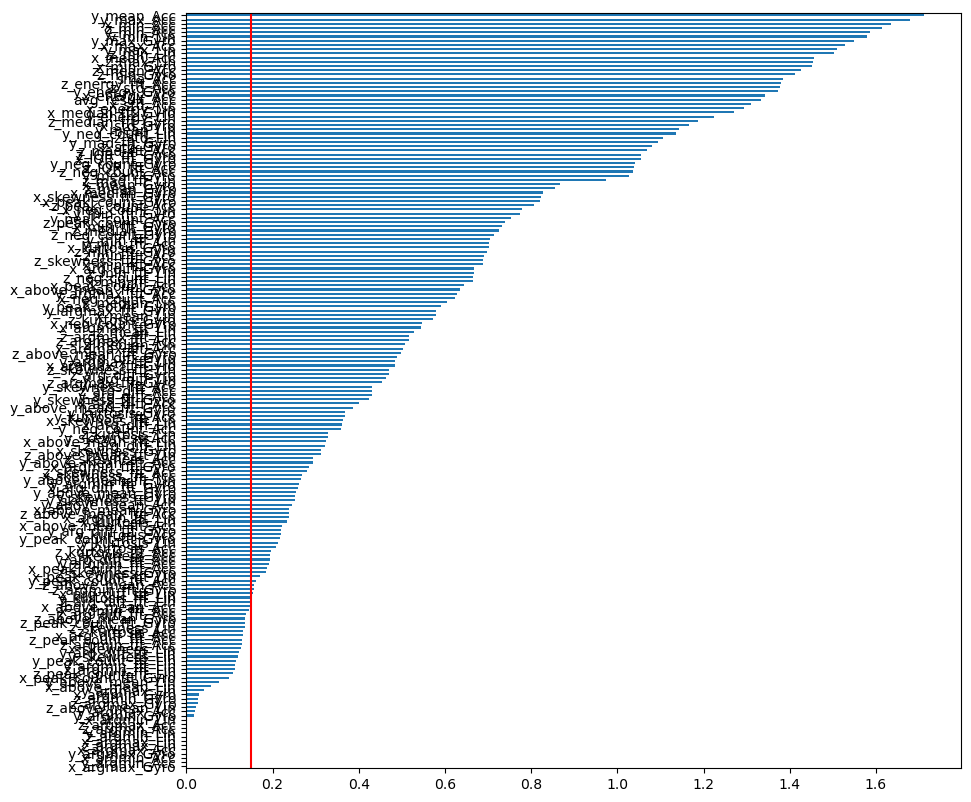

In [22]:
import matplotlib.pyplot as plt
# adjust the figure size
from matplotlib.pyplot import figure
figure(figsize=(10,10), dpi=100)
mutual_info.sort_values().plot(kind='barh')
plt.axvline(x=0.15,c='r')

In [23]:
l5=[]
for i in range(len(list(mutual_info))):
    if list(mutual_info)[i]<=0.15:
        l5.append(list(X_train.columns)[i])

In [24]:
len(l5)

40

In [25]:
X_train.drop(l5,axis=1,inplace=True)

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## Fit ExtraTreesClassifier with best set of parameters
model = ExtraTreesClassifier(n_estimators=50, min_samples_split=2, min_samples_leaf=3, criterion='gini',random_state=0)
model.fit(X_train,y_train)
print("model.feature_importances_:\n")
print(model.feature_importances_)
print("\n")
print("X_train.columns:\n")
print(X_train.columns)
ranked_features = pd.Series(model.feature_importances_, index = X_train.columns)

model.feature_importances_:

[2.99417346e-02 4.06256779e-02 5.32787341e-02 3.52598343e-03
 1.32106687e-02 3.97161202e-03 6.86643138e-03 1.26339501e-02
 6.25100232e-03 2.83915675e-02 1.37690003e-02 1.71728143e-02
 1.73311932e-02 1.31756961e-02 1.02666566e-02 2.53765494e-02
 2.81438716e-02 6.02560362e-03 1.25251031e-02 1.51947431e-02
 1.84712840e-02 1.51846934e-02 3.90675833e-02 1.31511703e-02
 1.30070503e-02 1.04884842e-02 1.86928139e-03 1.93617513e-03
 9.37008515e-03 4.05855089e-03 2.16232162e-02 6.63655766e-03
 1.25210353e-02 1.23742166e-02 3.45641550e-02 4.63498955e-03
 5.29029100e-03 2.03319101e-02 3.80870252e-03 5.44457085e-04
 8.69973969e-04 7.06095020e-04 2.29274827e-03 8.19661228e-03
 7.05656512e-03 1.23419786e-02 1.54445659e-02 1.87021674e-03
 5.92092121e-03 8.08709594e-04 4.77304657e-03 3.77776988e-03
 1.29763437e-03 3.17346874e-03 6.88921814e-04 2.22397921e-03
 1.64511818e-03 1.26518994e-03 3.83266648e-04 1.80914721e-03
 3.44357861e-03 4.12855806e-04 5.44962759e-03 4.26315693

Visual Representation of Feature Importance from Model (Red line indicates value=0.005):


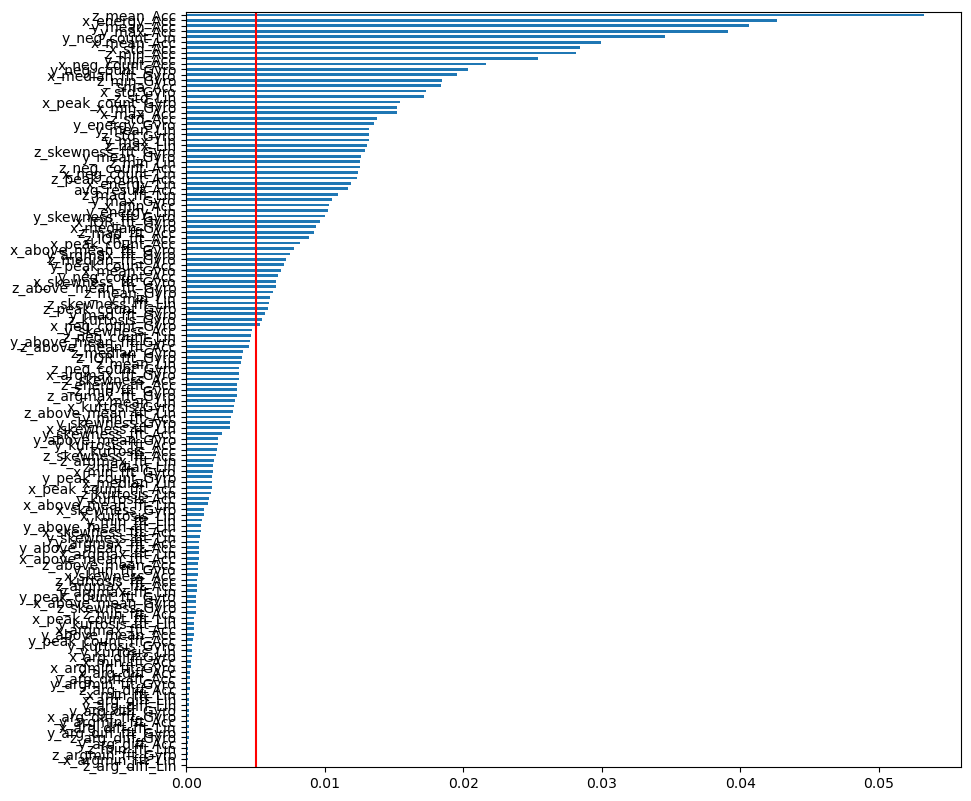

In [27]:
print("Visual Representation of Feature Importance from Model (Red line indicates value=0.005):")

## Visual Representaion
figure(figsize=(10,10), dpi=100)
ranked_features.sort_values().plot(kind='barh')
plt.axvline(x=0.005,c='r')
plt.show()

In [28]:
l6=[]
for i in range(len(list(ranked_features))):
    if list(mutual_info)[i]<=0.005:
        l6.append(list(X_train.columns)[i])

In [29]:
len(l6)

10

In [30]:
X_train.drop(l6,axis=1,inplace=True)

In [31]:
len(X_train.columns)

129

In [32]:
from collections import Counter
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))  ## balanced data

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.Class=0, n=216 (10.310%)
Class=3, n=210 (10.024%)
Class=2, n=206 (9.833%)
Class=1, n=214 (10.215%)
Class=4, n=207 (9.881%)

Class=6, n=202 (9.642%)
Class=5, n=211 (10.072%)


# Testing Data Preparation

In [33]:
X_test.drop(constant_columns, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_test.drop(l5,axis=1,inplace=True)
X_test.drop(l6,axis=1,inplace=True)

In [34]:
X_test.shape

(629, 129)

In [35]:
# all features excluded from tarining and testing
features_excluded_2= []
features_excluded_2.extend(constant_columns)
features_excluded_2.extend(corr_features)
features_excluded_2.extend(l5)
features_excluded_2.extend(l6)

In [36]:
len(features_excluded_2)

206

In [37]:
features_excluded_2

['y_maxmin_diff_Gyro',
 'avg_result_Accl_fft_Acc',
 'x_mad_fft_Gyro',
 'z_energy_Lin',
 'x_min_Lin',
 'z_maxmin_diff_Lin',
 'avg_result_Accl_fft_Lin',
 'z_mad_fft_Gyro',
 'y_IQR_fft_Gyro',
 'y_median_Gyro',
 'z_energy_Gyro',
 'x_mad_fft_Lin',
 'x_maxmin_diff_Acc',
 'z_mad_Lin',
 'x_max_fft_Acc',
 'avg_result_Lin',
 'x_mad_Acc',
 'x_pos_count_Lin',
 'z_mean_fft_Gyro',
 'z_IQR_Acc',
 'z_maxmin_diff_fft_Lin',
 'y_aad_Lin',
 'y_IQR_fft_Lin',
 'y_IQR_Gyro',
 'y_IQR_Acc',
 'z_max_fft_Acc',
 'z_aad_Lin',
 'x_maxmin_diff_fft_Lin',
 'z_aad_fft_Acc',
 'x_energy_fft_Acc',
 'y_max_fft_Lin',
 'x_mad_Lin',
 'x_mean_fft_Gyro',
 'x_mad_Gyro',
 'y_energy_fft_Acc',
 'x_mean_fft_Lin',
 'z_max_Gyro',
 'y_median_Acc',
 'y_pos_count_Acc',
 'x_max_Gyro',
 'x_aad_Acc',
 'y_peak_count_Lin',
 'x_median_fft_Lin',
 'y_std_fft_Gyro',
 'sma_fft_Gyro',
 'z_aad_Gyro',
 'x_pos_count_Gyro',
 'z_median_Acc',
 'z_median_fft_Lin',
 'x_std_Lin',
 'y_energy_Acc',
 'sma_Gyro',
 'z_max_Acc',
 'x_pos_count_Acc',
 'y_median_Lin

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [39]:
# We'll also check cross validation score from training set
# Import library for Repeated Random Cross Validation
from sklearn.model_selection import ShuffleSplit
ssplit = ShuffleSplit(n_splits=10,test_size=0.30,random_state=0)

# import library for RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [40]:
# creating hyperparameter grid
c_space=np.logaspace=(-5,8,15)
params_LOG = {'C':c_space,
              'max_iter':[50,100,150,200,500,1000],
              'multi_class' : ['ovr', 'multinomial']}

# instantiating logistic regression Classifier
Randomized_search_LOG = LogisticRegression()

# instantiating RandomizedSearchCV
Randomized_search_LOG = RandomizedSearchCV(Randomized_search_LOG,params_LOG,cv=5)
Randomized_search_LOG.fit(X_train,y_train)
best_params_LOG = Randomized_search_LOG.fit(X_train,y_train)

# print tuned parameters and score
print('Tuned Logistic Regression Parameters are:{}'.format(Randomized_search_LOG.best_params_))
print('Score:{}'.format(Randomized_search_LOG.best_score_))

predictions_training_LOG = Randomized_search_LOG.predict(X_train)
predictions_testing_LOG = Randomized_search_LOG.predict(X_test)


#print("Training accuracy of Support Vector Machine: ", format(accuracy_score(y_train,predictions_training_SVM),"0.2f"))
print("Training accuracy of Logistic Regression after Cross Validation in training portion:{}".format(accuracy_score(y_train,predictions_training_LOG),"0.2f"))
print("Testing accuracy of Logistic Regression:{}".format(accuracy_score(y_test,predictions_testing_LOG),"0.2f"))

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1309, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)"
ValueError: Penalty term must be positive; got (C=-5)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Tuned Logistic Regression Parameters are:{'multi_class': 'ovr', 'max_iter': 100, 'C': 8}
Score:0.99590675860788
Training accuracy of Logistic Regression after Cross Validation in training portion:1.0
Testing accuracy of Logistic Regression:0.9968203497615262


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
## Confusion Matrix
cm_LOG = confusion_matrix(y_test, predictions_testing_LOG)
print("Confusion Matrix : \n", cm_LOG)

## Classification Report
print(classification_report(y_test, predictions_testing_LOG))

## probability of falling into a particular class from each observation
probs_LOG = best_params_LOG.predict_proba(X_test)
probs_LOG = probs_LOG[:,1]
probs_LOG

Confusion Matrix : 
 [[82  0  0  0  0  0  0]
 [ 0 85  1  0  0  0  0]
 [ 0  0 94  0  0  0  0]
 [ 0  0  0 89  1  0  0]
 [ 0  0  0  0 93  0  0]
 [ 0  0  0  0  0 89  0]
 [ 0  0  0  0  0  0 95]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      0.99      0.99        86
           2       0.99      1.00      0.99        94
           3       1.00      0.99      0.99        90
           4       0.99      1.00      0.99        93
           5       1.00      1.00      1.00        89
           6       1.00      1.00      1.00        95

    accuracy                           1.00       629
   macro avg       1.00      1.00      1.00       629
weighted avg       1.00      1.00      1.00       629



array([6.27624572e-04, 6.08870811e-04, 1.64498116e-03, 6.99798936e-04,
       1.44747798e-03, 1.30449376e-03, 1.58824748e-04, 2.85052756e-05,
       4.07877356e-06, 9.97347281e-01, 3.35356711e-05, 3.97749688e-04,
       9.98084888e-01, 1.04456653e-04, 8.47778856e-06, 4.81537264e-05,
       3.92548564e-06, 9.97036933e-01, 1.78209438e-06, 1.85722571e-05,
       3.00530505e-03, 8.16630762e-05, 2.83620677e-03, 9.97763488e-01,
       3.63104356e-05, 1.11026048e-03, 2.30557619e-03, 1.85532107e-03,
       9.97676203e-01, 9.91861455e-01, 1.46249024e-03, 1.45132143e-04,
       7.45949708e-04, 1.70058498e-03, 3.97512960e-04, 2.05857222e-02,
       9.98419380e-01, 9.98538039e-01, 4.29378452e-04, 3.13173075e-05,
       9.95603653e-01, 4.10508484e-05, 5.94502026e-05, 2.13066922e-05,
       3.78655465e-04, 2.61880708e-06, 2.01204872e-04, 5.86322642e-06,
       9.96018267e-01, 9.97484683e-01, 8.53268653e-04, 1.16807118e-06,
       8.23990085e-06, 8.71206567e-04, 1.87364488e-03, 1.68681214e-06,
      

In [42]:
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RepeatedStratifiedKFold
#cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2,random_state=0)
#n_scores=cross_val_score(classifier,X,y,scoring='accuracy',cv=cv,n_jobs=-1)
#n_scores.mean()

# SVM

In [43]:
# import library for RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Import library to calculate cross validation score
from sklearn.model_selection import cross_val_score

In [44]:
# import library for Support Vector Machine
from sklearn.svm import SVC

# We'll also check cross validation score from training set
# Import library for Repeated Random Cross Validation
#from sklearn.model_selection import ShuffleSplit
#ssplit = ShuffleSplit(n_splits=10,test_size=0.30)

# import library for DecisionTree
from sklearn.svm import SVC

# make parameter Randomized for Support Vector Machine
params_SVM = {
    'C':[0.1, 1, 10, 100, 1000],
    'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['linear','poly','rbf']
}
print('Parameters to check are:\n',params_SVM)

# fitting Randomized_search on RandomizedForestClassifier and getting the best hyperparameters
Randomized_search_SVM = RandomizedSearchCV(SVC(probability=True, random_state=0), params_SVM, verbose=1, cv=5)
Randomized_search_SVM.fit(X_train, y_train)
best_params_SVM = Randomized_search_SVM.fit(X_train, y_train)

# print tuned parameters and score
print('Tuned SVC Parameters are:{}'.format(Randomized_search_SVM.best_params_))
print('Score:{}'.format(Randomized_search_SVM.best_score_))  # Mean cross-validated score of the best_estimator
predictions_training_SVM = Randomized_search_SVM.predict(X_train)
predictions_testing_SVM = Randomized_search_SVM.predict(X_test)


#print("Training accuracy of Support Vector Machine: ", format(accuracy_score(y_train,predictions_training_SVM),"0.2f"))
print("Training accuracy of Support Vector Machine after Cross Validation in training portion:{}".format(accuracy_score(y_train,predictions_training_SVM),"0.2f"))
print("Testing accuracy of Support Vector Machine:{}".format(accuracy_score(y_test,predictions_testing_SVM),"0.2f"))

Parameters to check are:
 {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear', 'poly', 'rbf']}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuned SVC Parameters are:{'kernel': 'linear', 'gamma': 1, 'C': 1000}
Score:0.9965893524645353
Training accuracy of Support Vector Machine after Cross Validation in training portion:1.0
Testing accuracy of Support Vector Machine:0.9968203497615262


In [45]:
## Confusion Matrix
cm_SVM = confusion_matrix(y_test, predictions_testing_SVM)
print("Confusion Matrix : \n", cm_SVM)

## Classification Report
print(classification_report(y_test, predictions_testing_SVM))

## probability of falling into a particular class from each observation
probs_SVM = best_params_SVM.predict_proba(X_test)
probs_SVM = probs_SVM[:,1]
probs_SVM 

Confusion Matrix : 
 [[81  0  0  0  0  1  0]
 [ 0 86  0  0  0  0  0]
 [ 0  0 94  0  0  0  0]
 [ 0  0  0 89  1  0  0]
 [ 0  0  0  0 93  0  0]
 [ 0  0  0  0  0 89  0]
 [ 0  0  0  0  0  0 95]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        82
           1       1.00      1.00      1.00        86
           2       1.00      1.00      1.00        94
           3       1.00      0.99      0.99        90
           4       0.99      1.00      0.99        93
           5       0.99      1.00      0.99        89
           6       1.00      1.00      1.00        95

    accuracy                           1.00       629
   macro avg       1.00      1.00      1.00       629
weighted avg       1.00      1.00      1.00       629



array([9.87844922e-04, 1.15195779e-03, 2.13419237e-03, 2.92438475e-03,
       2.93257961e-03, 1.62888659e-02, 1.51823762e-04, 1.40376855e-04,
       9.39567221e-04, 9.91960449e-01, 1.36130114e-03, 5.41484058e-03,
       9.81454883e-01, 2.87926580e-04, 1.18410212e-03, 7.11384467e-04,
       7.25186211e-04, 9.84263744e-01, 4.55986051e-04, 2.43693140e-03,
       2.98270433e-03, 1.03146175e-03, 5.36921954e-03, 9.94345836e-01,
       9.59785237e-04, 2.74926451e-03, 2.35106925e-03, 4.13821588e-03,
       9.87295488e-01, 9.88844161e-01, 2.52236820e-03, 3.11390337e-04,
       2.03483584e-03, 2.45487977e-03, 4.67966914e-03, 4.63485529e-02,
       9.87665124e-01, 9.86728479e-01, 1.57788724e-03, 2.68059604e-04,
       9.88634332e-01, 1.11460382e-03, 1.65943879e-03, 1.99130740e-04,
       4.46976594e-04, 9.89540570e-04, 1.25653313e-02, 2.21967295e-03,
       9.82262573e-01, 9.87990915e-01, 3.60403238e-03, 3.73118659e-04,
       1.90885442e-03, 1.73311906e-03, 9.93127965e-03, 2.16733930e-04,
      

In [46]:
#Randomized_search_SVM.cv_results_

In [47]:
#score=cross_val_score(SVC(C=1000, gamma=0.1, probability=True, random_state=0),X_train_new, y_train, cv=ssplit)
#score=cross_val_score(SVC(C=1000, gamma=0.001, probability=True, random_state=0),X_train, y_train, cv=ssplit)
#predictions_training_SVM_CV=score.mean()     
#predictions_testing_SVM = Randomized_search_SVM.predict(X_test)


#print("Training accuracy of Support Vector Machine: ", format(accuracy_score(y_train,predictions_training_SVM),"0.2f"))
#print("Training accuracy of Support Vector Machine after Cross Validation in training portion: ", format(predictions_training_SVM_CV,"0.2f"))
#print("Testing accuracy of Support Vector Machine: ", format(accuracy_score(y_test,predictions_testing_SVM),"0.2f"))

# Random Forest

In [48]:
# import library for RandomForest
from sklearn.ensemble import RandomForestClassifier

In [49]:
# make parameter Randomized for DecisionTree
params_RFC = {
    'criterion': ['entropy','gini'],
    
    'max_depth': [int(x) for x in np.linspace(10,100,5)],
    
    'max_features': ['auto','sqrt','log2'],
    
    'min_samples_leaf': [2,5,8],
    
    'min_samples_split': [2,5,10],
    
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=500, num=5)]
}
print('Parameters to check are:\n',params_RFC)

# fitting Randomized_search on RandomForestClassifier and getting the best hyperparameters
Randomized_search_RFC = RandomizedSearchCV(RandomForestClassifier(random_state=0), params_RFC, verbose=1, cv=5)
Randomized_search_RFC.fit(X_train, y_train)
best_params_RFC = Randomized_search_RFC.fit(X_train, y_train)

# print tuned parameters and score
print('Tuned SVC Parameters are:{}'.format(Randomized_search_RFC.best_params_))
print('Score:{}'.format(Randomized_search_RFC.best_score_))  # Mean cross-validated score of the best_estimator
predictions_training_RFC = Randomized_search_RFC.predict(X_train)
predictions_testing_RFC = Randomized_search_RFC.predict(X_test)


#print("Training accuracy of Support Vector Machine: ", format(accuracy_score(y_train,predictions_training_RFC),"0.2f"))
print("Training accuracy of Random Forest Classifier after Cross Validation in training portion:{}".format(accuracy_score(y_train,predictions_training_RFC),"0.2f"))
print("Testing accuracy of Random Forest Classifier:{}".format(accuracy_score(y_test,predictions_testing_RFC),"0.2f"))

Parameters to check are:
 {'criterion': ['entropy', 'gini'], 'max_depth': [10, 32, 55, 77, 100], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [2, 5, 8], 'min_samples_split': [2, 5, 10], 'n_estimators': [100, 200, 300, 400, 500]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuned SVC Parameters are:{'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 32, 'criterion': 'gini'}
Score:0.9959067586078799
Training accuracy of Random Forest Classifier after Cross Validation in training portion:1.0
Testing accuracy of Random Forest Classifier:0.9952305246422893


In [50]:
## Confusion Matrix
cm_RFC = confusion_matrix(y_test, predictions_testing_RFC)
print("Confusion Matrix : \n", cm_RFC)

## Classification Report
print(classification_report(y_test, predictions_testing_RFC))

## probability of falling into a particular class from each observation
probs_RFC = best_params_RFC.predict_proba(X_test)
probs_RFC = probs_RFC[:,1]
probs_RFC

Confusion Matrix : 
 [[80  0  0  0  0  2  0]
 [ 0 85  0  0  0  0  1]
 [ 0  0 94  0  0  0  0]
 [ 0  0  0 90  0  0  0]
 [ 0  0  0  0 93  0  0]
 [ 0  0  0  0  0 89  0]
 [ 0  0  0  0  0  0 95]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        82
           1       1.00      0.99      0.99        86
           2       1.00      1.00      1.00        94
           3       1.00      1.00      1.00        90
           4       1.00      1.00      1.00        93
           5       0.98      1.00      0.99        89
           6       0.99      1.00      0.99        95

    accuracy                           1.00       629
   macro avg       1.00      0.99      1.00       629
weighted avg       1.00      1.00      1.00       629



array([2.50000000e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.60714286e-03, 0.00000000e+00, 1.00000000e-03,
       8.33333333e-04, 1.00000000e+00, 3.12500000e-03, 1.93181818e-03,
       1.00000000e+00, 0.00000000e+00, 7.56845238e-03, 7.16964286e-03,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 8.33333333e-04,
       0.00000000e+00, 0.00000000e+00, 1.75000000e-03, 9.97500000e-01,
       0.00000000e+00, 0.00000000e+00, 3.34325397e-03, 1.86212121e-02,
       9.97916667e-01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.33333333e-03, 2.27668581e-02,
       1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.97500000e-01, 0.00000000e+00, 7.46428571e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.40153388e-02, 3.33963953e-02,
       9.99583333e-01, 9.99166667e-01, 1.77877262e-02, 0.00000000e+00,
       0.00000000e+00, 3.75000000e-03, 2.55555556e-03, 6.54365079e-03,
      

In [51]:
#score=cross_val_score(RandomForestClassifier(......),X_train, y_train, cv=ssplit)
#predictions_training_RFC_CV=score.mean()
#predictions_testing_RFC = Randomized_search_RFC.predict(X_test)

#print("Training accuracy of Random Forest Classifier: ", format(accuracy_score(y_train,predictions_training_RFC),"0.2f"))
#print("Training accuracy of Random Forest Classifier after Cross Validation: ", format(predictions_training_RFC_CV,"0.2f"))
#print("Testing accuracy of Random Forest Classifier: ", format(accuracy_score(y_test,predictions_testing_RFC),"0.2f"))

In [52]:
## AUC (Area Under Curve) Score
#auc_score_RFC = roc_auc_score(y_test, probs_RFC)
#print("Random Forest Classifier ROC AUC = ",format(auc_score_RFC,"0.2f"))

## no skill prediction (majority class)
#ns_probs = [0 for _ in range(len(y_test))]
#ns_auc = roc_auc_score(y_test, ns_probs)
#ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
#plt.plot(ns_fpr, ns_tpr, marker='.', label='No Skill Model')


## ROC Curve from Random Forest
#fpr_RFC, tpr_RFC, __RFC = roc_curve(y_test, probs_RFC)
#plt.plot(fpr_RFC, tpr_RFC, linestyle='--', label='Random Forest')
#plt.title("ROC Curve for Random Forest Classifier")

# axis labels
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
# show legend
#plt.legend()
# show the plot
#plt.show()

In [53]:
## AUC (Area Under Curve) Score
#auc_score_SVM = roc_auc_score(y_test, probs_SVM)
#print("Support Vector Machine ROC AUC = ",format(auc_score_SVM,"0.2f"))

## no skill prediction (majority class)
#ns_probs = [0 for _ in range(len(y_test))]
#ns_auc = roc_auc_score(y_test, ns_probs)
#ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
#plt.plot(ns_fpr, ns_tpr, marker='.', label='No Skill Model')

## ROC Curve of Support Vector Machine
#fpr_SVM, tpr_SVM, __SVM = roc_curve(y_test, probs_SVM)
#plt.plot(fpr_SVM, tpr_SVM, linestyle='--', label='Support Vector Machine')
#plt.title("ROC Curve for Support Vector Machine")

# axis labels
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
# show legend
#plt.legend()
# show the plot
#plt.show()

In [54]:
## AUC (Area Under Curve) Score
#auc_score_LOG = roc_auc_score(y_test, probs_LOG)
#print("Support Vector Machine ROC AUC = ",format(auc_score_LOG,"0.2f"))

## no skill prediction (majority class)
#ns_probs = [0 for _ in range(len(y_test))]
#ns_auc = roc_auc_score(y_test, ns_probs)
#ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
#plt.plot(ns_fpr, ns_tpr, marker='.', label='No Skill Model')

## ROC Curve of Support Vector Machine
#fpr_LOG, tpr_LOG, __LOG = roc_curve(y_test, probs_LOG)
#plt.plot(fpr_LOG, tpr_LOG, linestyle='--', label='Support Vector Machine')
#plt.title("ROC Curve for Support Vector Machine")

# axis labels
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
# show legend
#plt.legend()
# show the plot
#plt.show()